# Group 4 | HW3(MIS 71545)


Kavya Angara (ka32577, Soumya Agarwal (tbf), Anudeep Kumar Akkana (tbf)

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Question 1: Read in data
#### Code and output for Question 1

In [2]:
# reading gold text file into DataFrame and adding column headers
gold_df = pd.read_table("gold.txt",header=None,names=["url", "category"])
  
# reading labels text file into DataFrame and adding column headers
labels_df = pd.read_table("labels.txt",header=None,names=["turk","url", "category"])

# display DataFrame
print('Number of records in labels:', len(labels_df))
print('Number of records in gold:', len(gold_df))

Number of records in labels: 92721
Number of records in gold: 1517


### Question 2: Split into two DataFrames
#### Code and output for Question 2

In [3]:
#join labels_df and gold_df. drop duplicates from the resulting df
labels_on_gold= labels_df.merge(gold_df, left_on="url", right_on="url",suffixes=('_lbl','_gold'))

#get the urls from labels_df which are not present in gold_df 
labels_unknown=labels_df[~labels_df["url"].isin(labels_on_gold["url"])]
print('Number of records in labels_on_gold:', len(labels_on_gold))
print('Number of records in labels_unknown:', len(labels_unknown))


Number of records in labels_on_gold: 3324
Number of records in labels_unknown: 89397


### Question 3: Compute accuracies of turks
#### Code and output for Question 3

In [4]:


#create a data frame rater_goodness with turk as index and column as the total number of ratings
rater_goodness = pd.DataFrame(labels_on_gold["turk"].value_counts())
rater_goodness.rename(columns = {'turk':'no_of_ratings'}, inplace = True)
rater_goodness['no_of_matching_ratings']=pd.DataFrame(labels_on_gold[labels_on_gold['category_lbl']==labels_on_gold['category_gold']]["turk"].value_counts())
rater_goodness['avg_correctness_of_rating']=rater_goodness['no_of_matching_ratings']/rater_goodness['no_of_ratings']

rater_goodness




,no_of_ratings,no_of_matching_ratings,avg_correctness_of_rating
A31OCN4MNHUQ6W,184,143.0,0.777174
A153PKAL7OAY36,148,107.0,0.722973
A2BTR0GQ5B5JI6,126,66.0,0.523810
ATVALOQVDCMZW,103,88.0,0.854369
AZSDW7JJL5VA7,100,68.0,0.680000
...,...,...,...
A33CIJU1XC0YB6,1,1.0,1.000000
A2DYHB3BBD3UWQ,1,1.0,1.000000
A29JSKSFFWH330,1,NaN,NaN
AFHMR93GDJCGT,1,1.0,1.000000


### Question 4: Odds ratios
#### Code and output for Question 4

In [5]:
rater_goodness['avg_correctness_of_rating'] = rater_goodness['avg_correctness_of_rating'].replace(np.nan, 0)
rater_goodness['odds']=rater_goodness['avg_correctness_of_rating'] / (1.001 - rater_goodness['avg_correctness_of_rating'])
rater_goodness                                                          
                                                        

,no_of_ratings,no_of_matching_ratings,avg_correctness_of_rating,odds
A31OCN4MNHUQ6W,184,143.0,0.777174,3.472222
A153PKAL7OAY36,148,107.0,0.722973,2.600369
A2BTR0GQ5B5JI6,126,66.0,0.523810,1.097695
ATVALOQVDCMZW,103,88.0,0.854369,5.826657
AZSDW7JJL5VA7,100,68.0,0.680000,2.118380
...,...,...,...,...
A33CIJU1XC0YB6,1,1.0,1.000000,1000.000000
A2DYHB3BBD3UWQ,1,1.0,1.000000,1000.000000
A29JSKSFFWH330,1,NaN,0.000000,0.000000
AFHMR93GDJCGT,1,1.0,1.000000,1000.000000


### Question 5: Most accurate turks
#### Code and output for Question 5

In [6]:
#get turks who rated atleast 20
turks_atleast_20=rater_goodness[rater_goodness['no_of_ratings']>=20]
turks_atleast_20.sort_values(by='avg_correctness_of_rating',ascending=False).head(10)

,no_of_ratings,no_of_matching_ratings,avg_correctness_of_rating,odds
A2U0R4X38GUKZE,20,19.0,0.950000,18.627451
A22C0PJUBFJTI0,36,33.0,0.916667,10.869565
A23YQUBXZPKILZ,24,21.0,0.875000,6.944444
ATVALOQVDCMZW,103,88.0,0.854369,5.826657
A1HIXWH4OXT8S4,40,33.0,0.825000,4.687500
A3220HG1O83HQ4,22,18.0,0.818182,4.475385
A20PWAB7G3HDHU,20,16.0,0.800000,3.980100
A32W20KGQXS0LL,25,20.0,0.800000,3.980100
AJSJVK40F5HM6,28,22.0,0.785714,3.649635
A31OCN4MNHUQ6W,184,143.0,0.777174,3.472222


### Question 6: Rating counts versus accuracy
#### Code and output for Question 6

<AxesSubplot:xlabel='no_of_ratings', ylabel='avg_correctness_of_rating'>

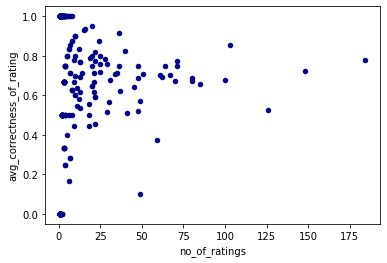

In [7]:
#rater_goodness
rater_goodness.plot.scatter(x='no_of_ratings',y='avg_correctness_of_rating', c='DarkBlue')

#### To answer this question, we plotted a scatterplot between 'no_of_ratings' and 'avg_correctness_of_rating'.  
#### By inferring the scatterplot and looking at the datapoints where number of ratings is more, we see the accuracy is usually higher. This suggests that a committed and accurate turk rates lots of URLs. 

### Question 7: Overall predicted odds
#### Code and output for Question 7

In [8]:
#rank the turks in rater_goodness based on number of rating in gold set
rater_goodness_idx_75=rater_goodness.reset_index(inplace=False)
rater_goodness_idx_75.rename(columns = {'index':'turk'}, inplace = True)
rater_goodness_idx_75['rank_prec_75']=rater_goodness_idx_75['no_of_ratings'].rank(pct=True)

#craeting a dataframe consisting only the turk who have rated more gold set urls than 75% of all turks
reliable_turk_75=rater_goodness_idx_75[rater_goodness_idx_75['rank_prec_75']>0.75][['turk','odds']]
print("Number of reliable turks:",len(reliable_turk_75))

#calculate overall predicted odds
#should we do left??? as its for all url not in gold
labels_unknown_for_reliable_turk_75=labels_unknown.merge(reliable_turk_75,left_on="turk",right_on="turk")                                                                
overall_predicted_odds_75=labels_unknown_for_reliable_turk_75.groupby(['url','category']).prod()
overall_predicted_odds_75=overall_predicted_odds_75.reset_index().rename(columns={"odds": "overall_odds"})
overall_predicted_odds_url_idx_75=overall_predicted_odds_75.set_index('url')
overall_predicted_odds_url_idx_75


Number of reliable turks: 68


,category,overall_odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000relationships.com,P,1.851852
...,...,...
http://zynga.com,G,3.704611
http://zz868.com,G,1.047852
http://zz868.com,P,1.851852


### Question 8: Predicted categories
#### Code and output for Question 8

In [9]:
#get highest overall odds by url
highest_overall_odds_by_url_75=pd.DataFrame(overall_predicted_odds_75.groupby('url')['overall_odds'].max()).reset_index()
result_75=overall_predicted_odds_75.merge(highest_overall_odds_by_url_75,left_on=['url','overall_odds']\
                             ,right_on=['url','overall_odds'])
result_75=result_75.rename(columns={"category": "top_category","overall_odds":"highest_overall_odds_by_url"},).set_index('url')
result_75.reset_index(inplace=True)

#get top odds for category 
category_top_odds_75=overall_predicted_odds_75.groupby('category').max('odds')
category_top_odds_75.reset_index(inplace=True)
category_top_odds_75

#create result_75
result_75=result_75.merge(category_top_odds_75,left_on='top_category',right_on='category')
result_75=result_75[['url','top_category','overall_odds']].rename(columns={"overall_odds": "top_odds"}).set_index('url')
                                                                                                                  
result_75


,top_category,top_odds
url,,
http://0-101.net,G,1.631168e+06
http://000.cc,G,1.631168e+06
http://0000.jp,G,1.631168e+06
http://000relationships.com,G,1.631168e+06
http://000vitamins.com,G,1.631168e+06
...,...,...
http://youniqueboutique.com,R,4.298555e+03
http://youradulttoystore.com,R,4.298555e+03
http://zebkbeer.com,R,4.298555e+03


### Question 9: Predicted categories using more turks
#### Code and output for Question 9

In [10]:
#rank the turks in rater_goodness based on number of rating in gold set
rater_goodness_idx_25=rater_goodness.reset_index(inplace=False)
rater_goodness_idx_25.rename(columns = {'index':'turk'}, inplace = True)
rater_goodness_idx_25['rank_prec_25']=rater_goodness_idx_25['no_of_ratings'].rank(pct=True)

#craeting a dataframe consisting only the turk who have rated more gold set urls than 75% of all turks
reliable_turk_25=rater_goodness_idx_25[rater_goodness_idx_25['rank_prec_25']>0.25][['turk','odds']]
print("Number of reliable turks:",len(reliable_turk_25))

#calculate overall predicted odds
#should we do left??? as its for all url not in gold
labels_unknown_for_reliable_turk_25=labels_unknown.merge(reliable_turk_25,left_on="turk",right_on="turk")                                                                
overall_predicted_odds_25=labels_unknown_for_reliable_turk_25.groupby(['url','category']).prod()
overall_predicted_odds_25=overall_predicted_odds_25.reset_index().rename(columns={"odds": "overall_odds"})
overall_predicted_odds_url_idx_25=overall_predicted_odds_25.set_index('url')



#get highest overall odds by url
highest_overall_odds_by_url_25=pd.DataFrame(overall_predicted_odds_25.groupby('url')['overall_odds'].max()).reset_index()
result_25=overall_predicted_odds_25.merge(highest_overall_odds_by_url_25,left_on=['url','overall_odds']\
                             ,right_on=['url','overall_odds'])
result_25=result_25.rename(columns={"category": "top_category","overall_odds":"highest_overall_odds_by_url"},).set_index('url')
result_25.reset_index(inplace=True)

#get top odds for category 
category_top_odds_25=overall_predicted_odds_25.groupby('category').max('odds')
category_top_odds_25.reset_index(inplace=True)
category_top_odds_25

#create result_25
result_25=result_25.merge(category_top_odds_25,left_on='top_category',right_on='category')
result_25=result_25[['url','top_category','overall_odds']].rename(columns={"overall_odds": "top_odds"}).set_index('url')
                                                                                                                  

#create a cross tab of result_75 and result_25
result_75_25=result_75.merge(result_25,left_on='url',right_on='url',suffixes=('_75','_25'))
crosstab_75_25=pd.crosstab(result_75_25['top_category_25'],result_75_25['top_category_75'])
crosstab_75_25


Number of reliable turks: 173


top_category_75,G,P,R,X
top_category_25,,,,
G,8329,181,21,34
P,564,336,36,9
R,177,53,130,29
X,203,15,28,474


In [14]:
overall_predicted_odds_25

,url,category,overall_odds
0,http://0-101.net,G,2.155963e+00
1,http://000.cc,G,2.181050e+03
2,http://000.cc,P,9.980040e-01
3,http://0000.jp,G,2.877556e+07
4,http://000relationships.com,G,0.000000e+00
...,...,...,...
16685,http://zz868.com,G,1.209566e+13
16686,http://zz868.com,P,1.851852e+00
16687,http://zzx.cc,G,1.330229e+00
16688,http://zzx.cc,P,9.980040e-01


In [13]:
result_25

,top_category,top_odds
url,,
http://0-101.net,G,1.209566e+13
http://000.cc,G,1.209566e+13
http://0000.jp,G,1.209566e+13
http://000vitamins.com,G,1.209566e+13
http://000webhost.com,G,1.209566e+13
...,...,...
http://yoni.com,R,8.080211e+09
http://zalet.ru,R,8.080211e+09
http://zenerx.com,R,8.080211e+09


In [12]:
result_75_25

,top_category_75,top_odds_75,top_category_25,top_odds_25
url,,,,
http://0-101.net,G,1.631168e+06,G,1.209566e+13
http://000.cc,G,1.631168e+06,G,1.209566e+13
http://0000.jp,G,1.631168e+06,G,1.209566e+13
http://000relationships.com,G,1.631168e+06,P,1.646827e+11
http://000vitamins.com,G,1.631168e+06,G,1.209566e+13
...,...,...,...,...
http://youniqueboutique.com,R,4.298555e+03,P,1.646827e+11
http://youradulttoystore.com,R,4.298555e+03,P,1.646827e+11
http://zebkbeer.com,R,4.298555e+03,P,1.646827e+11


In [11]:
pd.__version__

'1.4.3'